# MODEL TRAINING

Import data and library

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


importing data

In [119]:
df=pd.read_csv('S:RestaurantData.csv')

Top 5 record

In [120]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [121]:
df.dropna(inplace=True)

X and Y variables
we have to predict rating so we are dropping predict column

In [122]:
X=df.drop(columns=[
    'Aggregate rating',
    'Restaurant ID',
    'Restaurant Name',
    'Address',
    'Locality Verbose',
    'Switch to order menu',
    'Rating text'
],axis=1)


In [123]:
y=df['Aggregate rating']

In [124]:
#Create column transformer with 3 types
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
num_features=[
    'Longitude',
    'Latitude',
    'Average Cost for two',
    'Votes'
]

low_cat_features=[
    'Country Code',
    'Currency',
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Rating color'
]

high_cat_features=[
    'City',
    'Locality',
    'Cuisines'
]

preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_features),
        ('low_cat',OneHotEncoder(handle_unknown='ignore',drop='first'),low_cat_features),
        ('high_cat',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),high_cat_features)
    ],
    remainder='drop'
)

In [125]:
X=preprocessor.fit_transform(X)

In [126]:
X.shape

(9542, 40)

In [127]:
# separate dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((7633, 40), (1909, 40))

Evaluate function for metrics after model training

In [128]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square

In [129]:
models={
    'Linear Regression':LinearRegression(),
    'Lasso Regression':Lasso(),
    'Ridge Regression':Ridge(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'CatBoost Regressor':CatBoostRegressor(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'XGBoost Regressor':XGBRegressor(),
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)        #Train model

    #Make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.values())[i])

    print('Model performance for training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))

    print('------------------------------------')

    print('Model performance for test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
- Root Mean Squared Error: 0.1765
- Mean Absolute Error: 0.1286
- R2 Score: 0.9860
------------------------------------
Model performance for test set
- Root Mean Squared Error: 0.1788
Mean Absolute Error: 0.1304
- R2 Score: 0.9860


Lasso Regression
Model performance for training set
- Root Mean Squared Error: 1.4808
- Mean Absolute Error: 1.1916
- R2 Score: 0.0514
------------------------------------
Model performance for test set
- Root Mean Squared Error: 1.4739
Mean Absolute Error: 1.1817
- R2 Score: 0.0514


Ridge Regression
Model performance for training set
- Root Mean Squared Error: 0.1827
- Mean Absolute Error: 0.1320
- R2 Score: 0.9850
------------------------------------
Model performance for test set
- Root Mean Squared Error: 0.1850
Mean Absolute Error: 0.1334
- R2 Score: 0.9850


Decision Tree Regressor
Model performance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 0.9759

Results

In [130]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.986992
6,<catboost.core.CatBoostRegressor object at 0x0...,0.986831
0,LinearRegression(),0.986039
8,"XGBRegressor(base_score=None, booster=None, ca...",0.985981
2,Ridge(),0.985048
5,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.981812
3,DecisionTreeRegressor(),0.975947
7,KNeighborsRegressor(),0.185835
1,Lasso(),0.051366


Linear regression

In [131]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 98.60


plotting y_pred and y_test for visualization

Text(0, 0.5, 'Predicted')

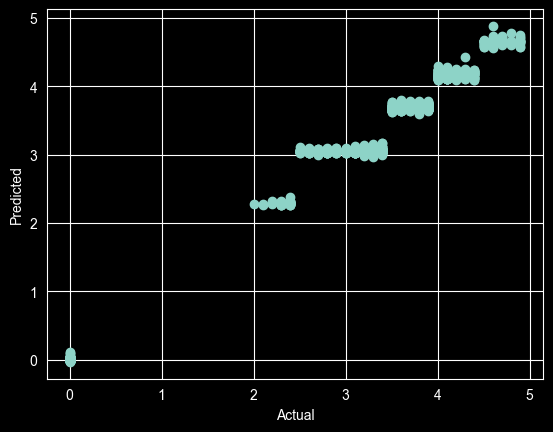

In [132]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Aggregate rating'>

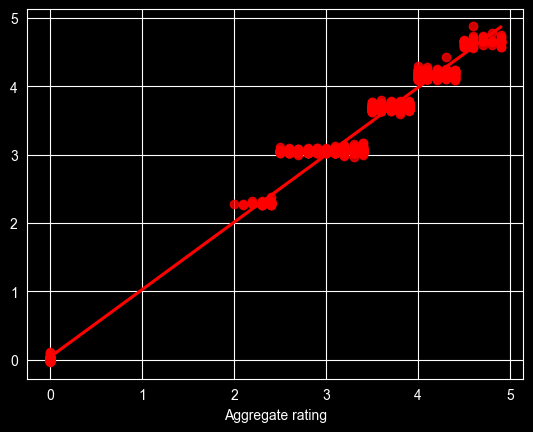

In [133]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference between actual and predicted Values

In [134]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual,Predicted,Difference
7142,0.0,0.027037,-0.027037
1860,4.1,4.133865,-0.033865
4425,3.3,3.038264,0.261736
3219,3.9,3.686170,0.213830
8308,0.0,-0.000735,0.000735
...,...,...,...
5612,0.0,-0.009797,0.009797
4061,0.0,0.034411,-0.034411
8746,0.0,-0.020572,0.020572
7678,0.0,-0.018800,0.018800
